In [2]:
#Import pandas,json and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_curve,auc
sns.set(style="whitegrid", color_codes=True)
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import cross_validation

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Load the dataset
# There are 4 datasets. We will use the bank_full and bank_additional_full
df_full = pd.read_csv('bank-full.csv',sep=';')
df_addi_full = pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
# Create a new Consumer confidence index range column. Its values are negative.
df_addi_full['Conf_index_range_neg'] = pd.cut(df_addi_full['cons.conf.idx'], bins=[-55,-50,-45,-40,-35,-30,-25], labels=['55-50','50-45','45-40','40-35','35-30','30-25'])
# Create a new Euribor3m range column
df_addi_full['euribor3m_range'] = pd.cut(df_addi_full.euribor3m, bins=[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])
# Create a consumer price index range column
df_addi_full['cons_price_range'] = pd.cut(df_addi_full['cons.price.idx'], bins=[92,93,94,95], labels=['92-93','93-94','94-95'])
# Create Duration range 
df_addi_full['duration_range'] = pd.cut(df_addi_full['duration'], bins=[0,600,1200,1800,2400,3000,3600,4200,4800,5400], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
# Create age groups
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_addi_full['age_binned'] = pd.qcut(df_addi_full['age'], 4, labels = age_group_names)
# How is the distribution of age groups
print("Age Distribution")
df_addi_full['age_binned'].value_counts()
#Describing dummy keys of the output variable column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_addi_full['y_dummy'] = df_addi_full['y'].map(lambda x: y_n_lookup[x])
print("Rate of positive response")
df_addi_full['y_dummy'].value_counts()
# Check the df
df_addi_full.head(20)

Age Distribution
Rate of positive response


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_addi_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
age                     41188 non-null int64
job                     41188 non-null object
marital                 41188 non-null object
education               41188 non-null object
default                 41188 non-null object
housing                 41188 non-null object
loan                    41188 non-null object
contact                 41188 non-null object
month                   41188 non-null object
day_of_week             41188 non-null object
duration                41188 non-null int64
campaign                41188 non-null int64
pdays                   41188 non-null int64
previous                41188 non-null int64
poutcome                41188 non-null object
emp.var.rate            41188 non-null float64
cons.price.idx          41188 non-null float64
cons.conf.idx           41188 non-null float64
euribor3m               41188 non-null float64
nr.employed       

In [7]:
df_addi_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Conf_index_range_neg', 'euribor3m_range', 'cons_price_range',
       'duration_range', 'age_binned', 'y_dummy'],
      dtype='object')

In [8]:
df_addi_full.shape

(41188, 27)

In [9]:
df_full.shape

(45211, 17)

In [10]:
data = df_addi_full[['age','job', 'duration','marital', 'education', 'campaign', 'pdays','previous', 'poutcome','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','default','loan','housing']]

In [11]:
data.head()

,age,job,duration,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,loan,housing
0,56,housemaid,261,married,basic.4y,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no
1,57,services,149,married,high.school,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,unknown,no,no
2,37,services,226,married,high.school,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,yes
3,40,admin.,151,married,basic.6y,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no
4,56,services,307,married,high.school,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes,no


In [12]:
#Use Label Encoder
le = preprocessing.LabelEncoder()

In [13]:
data.job = le.fit_transform(data.job)

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
le_job_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_job_mapping)

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


In [15]:
data.education = le.fit_transform(data.education)
le_education_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_education_mapping)
data.housing = le.fit_transform(data.housing)
le_housing_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_housing_mapping)
data.loan = le.fit_transform(data.loan)
le_loan_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_loan_mapping)
data.default = le.fit_transform(data.default)
le_default_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_default_mapping)
data.poutcome = le.fit_transform(data.poutcome)
le_poutcome_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_poutcome_mapping)
data.marital = le.fit_transform(data.marital)

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'failure': 0, 'nonexistent': 1, 'success': 2}


In [17]:
#print(le.get_params())
le_marital_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_marital_mapping)

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}


In [18]:
y = df_addi_full['y_dummy']

In [19]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 42)


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)
# Print the accuracy from the testing data.
print("Using accuracy score")
print(accuracy_score(logis.predict(X_test), y_test))
# Predicted data for test
y_pred = logis.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score:  0.908570635774
Testing score:  0.91130533301
Using accuracy score
0.91130533301
[[10705   263]
 [  833   556]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10968
          1       0.68      0.40      0.50      1389

avg / total       0.90      0.91      0.90     12357



In [21]:
#Logistic Regression taking class imbalance into consideration
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logis = LogisticRegression(class_weight = 'balanced')
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)
# Print the accuracy from the testing data.
print("Using accuracy score")
print(accuracy_score(logis.predict(X_test), y_test))
# Predicted data for test
y_pred = logis.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score:  0.851687419791
Testing score:  0.850206360767
Using accuracy score
0.850206360767
[[9303 1665]
 [ 186 1203]]
             precision    recall  f1-score   support

          0       0.98      0.85      0.91     10968
          1       0.42      0.87      0.57      1389

avg / total       0.92      0.85      0.87     12357



In [22]:
X_train.fillna(X_train.mean())
X_test.fillna(X_test.mean())
col_mask=X_train.isnull().any(axis=0)
col_mask1=X_test.isnull().any(axis=0)
#print(col_mask)
#print(col_mask1)
row_mask=X_train.isnull().any(axis=1)
row_mask1=X_test.isnull().any(axis=1)
#print("rows now")
#print(pd.isnull(X_train).sum() > 0)
#print("Infinity")
#print(np.where(X_train.values >= np.finfo(np.float64).max))
#print(np.isinf(X_train).any())
#print("null")
#print(np.where(X_train.values >= np.finfo(np.float64).max))
#print(np.isnan(X_train).any())
#X_train.reset_index(drop = True, inplace = True)
#print(X_train.head())
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x.iloc[train], y.iloc[train]) # fit
        result += score_func(clf.predict(x.iloc[test]), y.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average



In [23]:
clf = LogisticRegression()
score = cv_score(clf, X_train, y_train)
print(score)

0.90832790367


In [24]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100,1000]
best_score = 0
# Check score for each C
for C in Cs:
    # Instantiate Classifier
    logreg = LogisticRegression(C=C)
    # Calculate cv_score using training data
    score = cv_score(logreg, X_train, y_train)
    print('Training score for this C is: ', score)
    # Determine if this is the best score
    if score > best_score:
        best_score = score
        best_C = C
print('The C-value with the highest average cv_score:', best_C)
print('The highest average cv_score:', best_score)

Training score for this C is:  0.907287284856
Training score for this C is:  0.908605380368
Training score for this C is:  0.90832790367
Training score for this C is:  0.908362589761
Training score for this C is:  0.908431961943
Training score for this C is:  0.908362589761
The C-value with the highest average cv_score: 0.1
The highest average cv_score: 0.908605380368


In [25]:
# Instantiate the classifier with tuned hyperParameter
logreg_tuned1 = LogisticRegression(C = best_C)
# Fit the model
logreg_tuned1.fit(X_train,y_train)
# Predict based on test data
y_pred = logreg_tuned1.predict(X_test)
# Check the accuracy
accuracy_score(y_pred,y_test)

0.91130533300963013

Accuracy score has now improved slightly.
We will now check how the AUC and accuracy score changes as we take care of class imbalance

In [26]:
from sklearn.model_selection import GridSearchCV

# Set up parameters
parameters = {'C' : Cs}
# Instantiate logistic regression classifier
# Perform Grid search cross validation with 5 folds
logreg_cv = GridSearchCV(logreg, parameters, cv= 5, scoring = cv_score)
#logreg_cv = GridSearchCV(logreg, parameters, cv= 5, scoring = accuracy_score)
#logreg_cv = GridSearchCV(logreg, parameters, cv= 5)
# Fit the model with best choice of C from the GridSearch step
logreg_cv.fit(X_train,y_train)
# print the best choice of C
logreg_cv.best_params_

{'C': 1000}

In [27]:
logreg_cv.best_score_

0.9086749128378272

In [28]:
# Instantiate the tuned model
logreg_tuned2 = LogisticRegression(C = logreg_cv.best_params_['C'] )
# Fit the tuned model
logreg_tuned2.fit(X_train,y_train)
# Predict
y_pred2 = logreg_tuned2.predict(X_test)
accuracy_score(y_pred2,y_test)

0.91146718459172937

In [29]:
print("Coefficients")
print(logreg_tuned2.coef_)
print("Intercept")
print(logreg_tuned2.intercept_)

Coefficients
[[ 0.00441546  0.00757703  0.0044572   0.07109101  0.07541692 -0.04502248
  -0.00148666 -0.19592096  0.27868478 -0.35361367  0.34356604  0.02999786
  -0.1201861  -0.00654415 -0.24810957 -0.00268163 -0.01460522]]
Intercept
[ 0.00279218]


In [30]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[10702   266]
 [  828   561]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10968
          1       0.68      0.40      0.51      1389

avg / total       0.90      0.91      0.90     12357



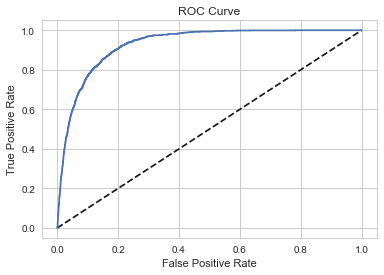

In [31]:
# Compute predicted probabilities: label_pred_prob
label_pred_prob = logreg_tuned2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, label_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [32]:
print("Area under curve(AUC)")
print(auc(fpr, tpr))

Area under curve(AUC)
0.928672073849


<b>Now, we will apply Support vector machine to check how that model performs</b>

In [33]:
from sklearn.svm import SVC
clf = SVC()

In [34]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.88759407623209519

<b>Now, we will apply Random forest clasifier to check how that model performs</b>

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [38]:
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

In [39]:
accuracy_score(y_test, predict)

0.90960589139758841

Random Forest classifier with class imbalance taken care of

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

In [41]:
accuracy_score(y_test, predict)

0.90863478190499314

In [42]:
# Find feature importances
feature_importance = pd.DataFrame(rfc.feature_importances_).T
feature_importance.columns = list(X_train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_importance']
feature_importance.sort_values('feature_importance', ascending=False)

,feature_importance
duration,0.425972
euribor3m,0.122945
nr.employed,0.121655
age,0.065957
cons.price.idx,0.031871
cons.conf.idx,0.031086
education,0.030030
job,0.029622
campaign,0.028388
emp.var.rate,0.024751


Random Forest Classifier has good accuracy

<b>Now, we will apply Decision Tree Classifier, K Nearest Neighbor, Linear Discriminant Analysis to check how these models perform</b>

In [43]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

In [45]:
# evaluate each model in turn - LDA, KNN, Decision Tree and Gauassian Naive Bias
print("Accuracy scores in different models")
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Accuracy scores in different models
LDA: 0.906282 (0.004004)
K-NN: 0.902778 (0.004060)
CART: 0.887517 (0.004761)
NB: 0.844022 (0.005484)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
age               41188 non-null int64
job               41188 non-null int64
duration          41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
default           41188 non-null int64
loan              41188 non-null int64
housing           41188 non-null int64
dtypes: float64(5), int64(12)
memory usage: 5.3 MB


<b> Now, we will apply Neural network</b>

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import xgboost

Using TensorFlow backend.


In [48]:
model = Sequential()
model.add(Dense(10, input_dim=17, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
import numpy as np
X_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
print(X_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)
print(y_train_keras.shape)

(28831, 17)
(28831, 1)


In [51]:
model.fit(np.array(X_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
28831/28831 [==============================] - 1s 20us/step - loss: 0.3859 - acc: 0.8872
Epoch 2/10
28831/28831 [==============================] - 0s 14us/step - loss: 0.3524 - acc: 0.8872
Epoch 3/10
28831/28831 [==============================] - 0s 12us/step - loss: 0.3523 - acc: 0.8872
Epoch 4/10
28831/28831 [==============================] - 0s 10us/step - loss: 0.3523 - acc: 0.8872
Epoch 5/10
28831/28831 [==============================] - 0s 10us/step - loss: 0.3523 - acc: 0.8872
Epoch 6/10
28831/28831 [==============================] - 0s 9us/step - loss: 0.3523 - acc: 0.8872
Epoch 7/10
28831/28831 [==============================] - 0s 10us/step - loss: 0.3523 - acc: 0.8872
Epoch 8/10
28831/28831 [==============================] - 0s 11us/step - loss: 0.3523 - acc: 0.8872
Epoch 9/10
28831/28831 [==============================] - 0s 10us/step - loss: 0.3523 - acc: 0.8872
Epoch 10/10
28831/28831 [==============================] - 0s 10us/step - loss: 0.3523 - acc: 0.8872


In [52]:
scores  =  model.evaluate(np.array(X_test), np.array(y_test))

12357/12357 [==============================] - 0s 17us/step


In [53]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 88.76%


<b> Now, we will create clusters of customers and figure out optimum number of cluster with elbow methos</b>

In [54]:
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
#x_cols = np.matrix(df[1:])
x_cols = np.matrix(data)

In [55]:
kmeans = KMeans()
clusters_pred = kmeans.fit_transform(x_cols)

In [56]:
ks = range(2,11)
ss = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x_cols)
    ss.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

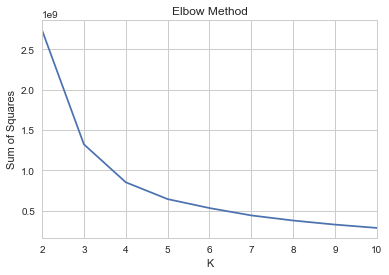

In [57]:
_ = plt.plot(ks, ss)
_ = plt.xlim([2,10])
_ = plt.xlabel('K')
_ = plt.ylabel('Sum of Squares')
_ = plt.title('Elbow Method')
plt.show()

In [58]:
# best k = 3
cluster_pred = KMeans(n_clusters=3, random_state=1).fit_predict(x_cols)

In [59]:
cluster_population = pd.Series(cluster_pred).value_counts().sort_index()
cluster_population
print("With 3 clusters")
_ = cluster_population.plot(kind='bar')
_ = plt.ylabel('Number of Points')
_ = plt.xlabel('Cluster Number')
_ = plt.title('Population of Clusters for $K$ = 3')

0     4820
1    34859
2     1509
dtype: int64

With 3 clusters


In [60]:
# best k = 4
cluster_pred1 = KMeans(n_clusters=4, random_state=1).fit_predict(x_cols)

In [61]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
data['cluster'] = kmeans_model.fit_predict(x_cols)
data.head()

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,job,duration,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,loan,housing,cluster
0,56,3,261,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,7,149,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0
2,37,7,226,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,2,0
3,40,0,151,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,7,307,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,0


In [62]:
print("With 4 clusters")
data.cluster.value_counts()

With 4 clusters


0    29406
1     8698
2     1582
3     1502
Name: cluster, dtype: int64

In [63]:
data.groupby('cluster').describe()['job']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,29406.0,3.722540,3.605873,0.0,0.0,2.0,7.0,11.0
1,8698.0,3.669924,3.539935,0.0,1.0,2.0,7.0,11.0
2,1582.0,3.568268,3.509103,0.0,1.0,2.0,7.0,11.0
3,1502.0,4.245672,3.732775,0.0,0.0,4.0,8.0,11.0


In [64]:
data.groupby('cluster').job.value_counts()

cluster  job
0        0      7442
         1      6656
         9      4927
         7      2843
         4      2095
         5      1097
         2      1055
         6      1015
         3       783
         10      733
         8       513
         11      247
1        0      2124
         1      2078
         9      1342
         7       901
         4       613
         5       387
         2       312
         6       304
         3       203
         8       191
         10      187
         11       56
2        1       394
         0       390
         9       241
         7       149
         4       110
         6        70
         2        63
         5        62
         3        33
         8        32
         10       30
         11        8
3        0       466
         9       233
         5       174
         8       139
         1       126
         4       106
         7        76
         10       64
         3        41
         6        32
         2        26


Cluster 0 has a greater proportion of people with admin job category than cluster 1.

In [65]:
print("Checking the cluster on variation of duration")
data.groupby('cluster').describe()['duration']

Checking the cluster on variation of duration


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,29406.0,142.756342,75.783721,0.0,83.00,135.0,199.00,309.0
1,8698.0,473.838009,135.230907,304.0,360.00,436.0,563.00,822.0
2,1582.0,1172.082807,398.335190,823.0,917.25,1061.5,1285.75,4918.0
3,1502.0,309.368842,213.623888,1.0,164.00,252.0,386.75,1260.0


In [66]:
print("Checking the cluster on variation of marital status")
data.groupby('cluster').marital.value_counts()

Checking the cluster on variation of marital status


cluster  marital
0        1          17937
         2           8087
         0           3335
         3             47
1        1           5252
         2           2453
         0            970
         3             23
2        1            948
         2            462
         0            167
         3              5
3        1            791
         2            566
         0            140
         3              5
Name: marital, dtype: int64

KeyError: 'Column not found: y_dummy'

0    29406
1     8698
2     1582
3     1502
dtype: int64

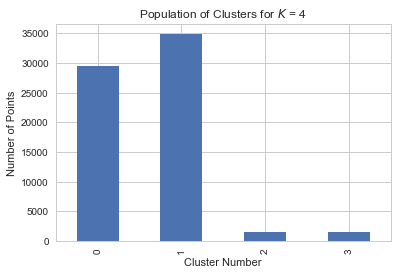

In [67]:
cluster_population1 = pd.Series(cluster_pred1).value_counts().sort_index()
cluster_population1

_ = cluster_population1.plot(kind='bar')
_ = plt.ylabel('Number of Points')
_ = plt.xlabel('Cluster Number')
_ = plt.title('Population of Clusters for $K$ = 4')
plt.show()

In [68]:

# Initialize pca with 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

# Begin building dataframe
df_pca = pd.DataFrame(np.array(data.index))

# Initialize clusterer using 3 clusters, fit and predict on x_cols 
clusterer = KMeans(n_clusters=4, random_state=10)
clusterer.fit_predict(x_cols)

# Continue building dataframe
df_pca['cluster_label'] = pd.DataFrame(clusterer.fit_predict(x_cols)) 
df_pca['x'] = pd.DataFrame(pca.fit_transform(x_cols)).iloc[:,0]
df_pca['y'] = pd.DataFrame(pca.fit_transform(x_cols)).iloc[:,1]
df_pca.columns = ['index', 'cluster_label', 'x', 'y']
df_pca

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

,index,cluster_label,x,y
0,0,0,-0.451762,-39.974343
1,1,0,-112.125759,-31.460844
2,2,0,-35.351146,-37.348093
3,3,0,-110.131615,-31.650348
4,4,0,45.413537,-43.464684
5,5,0,-63.269039,-35.206652
6,6,0,-122.096224,-30.700013
7,7,0,-44.324713,-36.658217
8,8,1,118.198973,-49.068957
9,9,0,-210.838462,-24.001602


In [69]:
#set style of plots
sns.set(style='white', palette='muted')

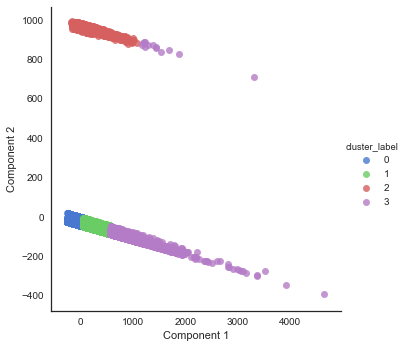

In [70]:
#plot data with seaborn
ax = sns.lmplot(data=df_pca, x='x', y='y', hue='cluster_label', 
                   fit_reg=False, legend=True, legend_out=True)
_ = ax.set_axis_labels("Component 1", "Component 2")

# _ = plt.scatter(df_pca['x'], df_pca['y'], c=df_pca['cluster_label'], edgecolors='k')
# _ = plt.xlabel('Component 1')
# _ = plt.ylabel('Component 2')
# _ = plt.title('PCA Components')
plt.show()

In [71]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 4 columns):
index            41188 non-null int64
cluster_label    41188 non-null int32
x                41188 non-null float64
y                41188 non-null float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.1 MB


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null int64
duration          41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
default           41188 non-null int64
loan              41188 non-null int64
housing           41188 non-null int64
cluster           41188 non-null int32
dtypes: float64(5), int32(1), int64(12)
memory usage: 5.5 MB


In [73]:
data.head()

,age,job,duration,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,loan,housing,cluster
0,56,3,261,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,7,149,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0
2,37,7,226,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,2,0
3,40,0,151,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,7,307,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,0


In [74]:
data['index'] = range(0, len(data.index))    

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_addi_full['index'] = range(0, len(df_addi_full.index)) 
df_addi_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0,4


In [89]:
data.head()


,age,job,duration,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,loan,housing,cluster,index
0,56,3,261,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
1,57,7,149,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
2,37,7,226,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,2,0,2
3,40,0,151,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,3
4,56,7,307,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,0,4


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Conf_index_range_neg', 'euribor3m_range', 'cons_price_range',
       'duration_range', 'age_binned', 'y_dummy', 'index'],
      dtype='object')

In [90]:
df_new = pd.merge_ordered(data, df_addi_full, how='inner',on= 'index')
df_new.head()
df_new.columns

,age_x,job_x,duration_x,marital_x,education_x,campaign_x,pdays_x,previous_x,poutcome_x,emp.var.rate_x,...,cons.conf.idx_y,euribor3m_y,nr.employed_y,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy
0,56,3,261,1,0,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
1,57,7,149,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
2,37,7,226,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0
3,40,0,151,1,1,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
4,56,7,307,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0


Index(['age_x', 'job_x', 'duration_x', 'marital_x', 'education_x',
       'campaign_x', 'pdays_x', 'previous_x', 'poutcome_x', 'emp.var.rate_x',
       'cons.price.idx_x', 'cons.conf.idx_x', 'euribor3m_x', 'nr.employed_x',
       'default_x', 'loan_x', 'housing_x', 'cluster', 'index', 'age_y',
       'job_y', 'marital_y', 'education_y', 'default_y', 'housing_y', 'loan_y',
       'contact', 'month', 'day_of_week', 'duration_y', 'campaign_y',
       'pdays_y', 'previous_y', 'poutcome_y', 'emp.var.rate_y',
       'cons.price.idx_y', 'cons.conf.idx_y', 'euribor3m_y', 'nr.employed_y',
       'y', 'Conf_index_range_neg', 'euribor3m_range', 'cons_price_range',
       'duration_range', 'age_binned', 'y_dummy'],
      dtype='object')

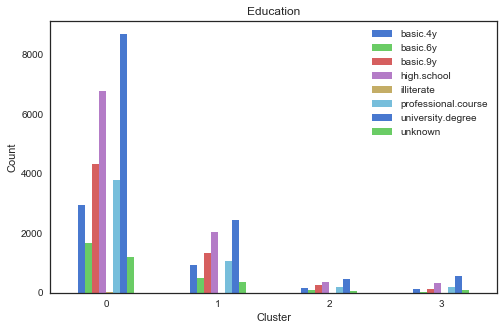

In [78]:
_ = pd.crosstab(data['cluster'], data['education']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Education')
_ = plt.xlabel('Cluster')
_ = plt.xticks(range(0,4), ('0', '1', '2','3'), rotation=0) 
_ = plt.ylabel('Count')
_ = plt.legend(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'])
plt.show()

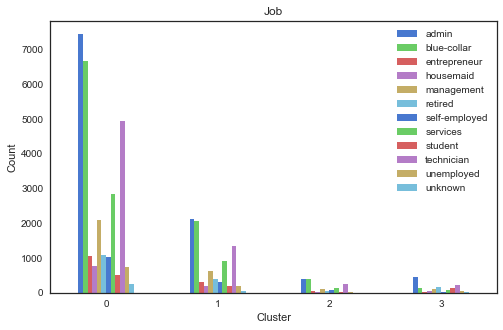

In [79]:
_ = pd.crosstab(data['cluster'], data['job']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Job')
_ = plt.xlabel('Cluster')
_ = plt.xticks(range(0,4), ('0', '1', '2','3'), rotation=0) 
_ = plt.ylabel('Count')
_ = plt.legend(['admin','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'])
plt.show()

In [91]:
df_new.groupby('cluster')['y_dummy'].mean()

cluster
0    0.035095
1    0.200966
2    0.570164
3    0.637816
Name: y_dummy, dtype: float64

<b> Now we will apply logistic regression for cluster 0</b>

In [80]:
# Applying logistic regression only for cluster 0
df_cluster0 = df_new.loc[df_new['cluster'] == 0]
df_cluster0.head()



,age_x,job_x,duration_x,marital_x,education_x,campaign_x,pdays_x,previous_x,poutcome_x,emp.var.rate_x,...,cons.conf.idx_y,euribor3m_y,nr.employed_y,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy
0,56,3,261,1,0,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
1,57,7,149,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
2,37,7,226,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0
3,40,0,151,1,1,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
4,56,7,307,1,3,1,999,0,1,1.1,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0


In [81]:
df_cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29406 entries, 0 to 41187
Data columns (total 46 columns):
age_x                   29406 non-null int64
job_x                   29406 non-null int64
duration_x              29406 non-null int64
marital_x               29406 non-null int64
education_x             29406 non-null int64
campaign_x              29406 non-null int64
pdays_x                 29406 non-null int64
previous_x              29406 non-null int64
poutcome_x              29406 non-null int64
emp.var.rate_x          29406 non-null float64
cons.price.idx_x        29406 non-null float64
cons.conf.idx_x         29406 non-null float64
euribor3m_x             29406 non-null float64
nr.employed_x           29406 non-null float64
default_x               29406 non-null int64
loan_x                  29406 non-null int64
housing_x               29406 non-null int64
cluster                 29406 non-null int32
index                   29406 non-null int64
age_y                   29

In [82]:
y_c = df_cluster0['y_dummy']

In [83]:
data_cluster = df_cluster0[['age_x','job_x', 'duration_x','marital_x', 'education_x', 'campaign_x', 'pdays_x','previous_x', 'poutcome_x','emp.var.rate_x', 'cons.price.idx_x',
       'cons.conf.idx_x', 'euribor3m_x', 'nr.employed_x','default_x','loan_x','housing_x']]

In [84]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(data_cluster, y_c, test_size = 0.3, random_state = 42)

In [85]:
logis_c = LogisticRegression(class_weight = 'balanced')
logis_c.fit(X_train, y_train)
logis_score_train_c = logis_c.score(X_trainc, y_trainc)
print("Training score: ",logis_score_train_c)
logis_score_test_c = logis_c.score(X_testc, y_testc)
print("Testing score: ",logis_score_test_c)
# Print the accuracy from the testing data.
print("Using accuracy score")
print(accuracy_score(logis_c.predict(X_testc), y_testc))
# Predicted data for test
y_predc = logis_c.predict(X_testc)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_testc, y_predc))
print(classification_report(y_testc, y_predc))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Training score:  0.931208705791
Testing score:  0.931874858309
Using accuracy score
0.931874858309
[[8018  484]
 [ 117  203]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.96      8502
          1       0.30      0.63      0.40       320

avg / total       0.96      0.93      0.94      8822



Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'ROC Curve')

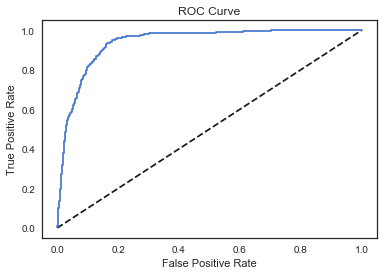

In [86]:
# Compute predicted probabilities: label_pred_prob
label_pred_prob = logis_c.predict_proba(X_testc)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_testc, label_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [87]:
print("Area under the curve")
print(auc(fpr, tpr))

Area under the curve
0.938198732651


We got excellent AUC and F1 score after applying logistic regression for cluster 0